Chargement des fichiers et récupération de la partie "content"

In [1]:
#importation des packages et modules
import os
import json
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np 

In [2]:
#définition d'une fonction d'ouverture de tous les fichiers qui récupère la partie "content"

def content_loading(chemin_acces):
    data = []
    for filename in os.listdir(chemin_acces):
        if filename.endswith(".json"):
            with open(os.path.join(chemin_acces, filename), 'r', encoding="utf-8") as read_file:
                lecture = json.load(read_file)
                data = lecture[0:]
            
    corpus = []
    for key in data[0:]:
        key = key["content"]
        corpus.append(key)
      
    return corpus 




Un problème se pose: 
- d'abord mon dossier contient 187 fichiers et quand je verifie le nombre de content recupéré ça m'affiche 63.
Pourquoi seulement 63 fichiers sont ouvert sur 187 ? sachant dans un seul fichier, il y a plusieurs content également (surement un problème de code ?)
- ensuite quand je récupère les noms des auteurs, un seul nom apprait dans tous fichiers, ce qui ne me parait pas normal : est ce tous fichiers de clarence qui sont chargés ? mon code à t'il bien fonctionné ?

In [3]:
chemin_acces = "../data_blogger" 
corpus = content_loading(chemin_acces)
print(corpus)


['<div style="text-align: justify;">Montréal se fait manger l\'intérieur par le long ténia qui le traverse a longueur de journée. Il s\'arrête a chaque station, comme un hoquet sans fin. Il fait une pause a Berri-Uqam quelques instants, le temps de prendre dans son wagon un homme pressé qui s\'en va a un rendez-vous important a l\'hôpital Notre-Dame. En plus de son costume qui lui donne un air rigolo, il porte un masque anti-projection. Il entre de justesse dans le wagon et les portes se referment malheureusement sur sa cravate, le prenant au piège. Le stress s\'empare de lui et c\'est malencontreux, car son syndrome de Tourette ne s\'en trouve qu\'exacerbé. Il lance des petits sons stridents et sa coprolalie le prend de plus belle: pute, vache, salope, connerie, va chier, putain, connasse, etc. Sa cravate en prend pour son rhume. Une jeune femme le voit et pouffe de rire: la jeune autiste tient serré son Ipod qu\'elle a enfoncé sur ses oreilles. Toute intrusion sonore autre que sa mus

In [4]:
print("Votre Corpus contient :", len(corpus))

Votre Corpus contient : 63


In [5]:
corpus[5]

'<div style="text-align: justify;">Les tourniquets bippent et cliquètent, vomissant en petits rots la horde piétinante et babillante de passagers. La rumeur de pas et de mots s’intensifie, les étoffes se frottent, les éclats de voix sont assourdis alors qu’un soufflement de ventilateur annonce l’arrivée du métro. Les portes claquent comme le couperet de la guillotine sur le cou du condamné et déversent et ravalent leur lot de voyageurs. Un crissement froid de pantalons en matière synthétique et un claquement de semelles en caoutchouc s’approchent à toute vitesse du wagon alors que la voix désincarnée de la STM en personne ordonne de libérer les portes. L’homme se glisse entre celles-ci, lâchant malgré lui un cri d’effort pathétique. Chonk! </div><div style="text-align: justify;"><br />\n</div><div style="text-align: justify;">Soufflant comme un marathonien en fin d’épreuve, il tire sur sa cravate restée prise entre les deux portes, tel un contrebassiste jazz tentant d’atteindre le it. 

In [6]:
soup1 = []
for c in corpus:
    soup = BeautifulSoup(c.replace("<br />", "\n"), 'html.parser')
    soup1.append(soup.get_text().replace("\xa0", " "))
texte = []
for s in soup1:     
    texte.append(s.replace("\n", " "))
print(texte)

["Montréal se fait manger l'intérieur par le long ténia qui le traverse a longueur de journée. Il s'arrête a chaque station, comme un hoquet sans fin. Il fait une pause a Berri-Uqam quelques instants, le temps de prendre dans son wagon un homme pressé qui s'en va a un rendez-vous important a l'hôpital Notre-Dame. En plus de son costume qui lui donne un air rigolo, il porte un masque anti-projection. Il entre de justesse dans le wagon et les portes se referment malheureusement sur sa cravate, le prenant au piège. Le stress s'empare de lui et c'est malencontreux, car son syndrome de Tourette ne s'en trouve qu'exacerbé. Il lance des petits sons stridents et sa coprolalie le prend de plus belle: pute, vache, salope, connerie, va chier, putain, connasse, etc. Sa cravate en prend pour son rhume. Une jeune femme le voit et pouffe de rire: la jeune autiste tient serré son Ipod qu'elle a enfoncé sur ses oreilles. Toute intrusion sonore autre que sa musique la rend totalement insécure. Elle n'en

In [7]:
texte[7]

"Comprimée. Comme dans une chambre hyperbare sans oxygène. La ligne orange dans le trafic. Mon petit matin bombardé de textures moites et chaudasses. Mon café renversé comme une averse bouillante et soudaine sur ma jolie robe à imprimé Liberty rose pâle, pâle, pâle. La chaleur trop vive sur ma peau juste un peu bronzée du début de l'été, l'humidité collante d'un expresso déversé dans un décolleté au lieu d'être bu d'un trait. À cause d'un pauvre con qui jouait du coude. Sa cravate orange métallique de douchebag qui ne voulait pas collaborer. Pognée dans porte. Quel débile avec ses pompes de dégénéré. On dirait des chaussons blancs de poupons. Pas moyen qu'il s'excuse poliment et lève les feutres comme un parfait pas de classe. La vague sensation que tout le monde est beaucoup trop dans ma bulle. Comme s'ils me grattaient l'intérieur de leurs regards trop appuyés et que leur souffle à l'unisson me balayait le visage d'un vent désagréable de papier sablé à l'haleine réchauffée et laiteus

In [8]:
with open("content_list.txt", "w", encoding = "utf8") as f:
    for line in texte:
        f.write(f"{line}\n")
        
with open("content.txt", "w", encoding = "utf8") as f:
    f.writelines(texte)

In [9]:
content = ""
with open("content.txt", "r", encoding= "utf8") as read_file:
    content = content.join(line.rstrip("\n") + " " for line in read_file.readlines())

In [12]:
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

limit = 100

fontcolor='#fa0000' # couleur des caractères
bgcolor = '#000000' # couleur de fond

    
wordcloud = WordCloud(
    max_words=limit,
    stopwords = set(stopwords.words('french')), # liste de mots-outils   
    background_color=bgcolor,
).generate(content.lower()) 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\brune\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


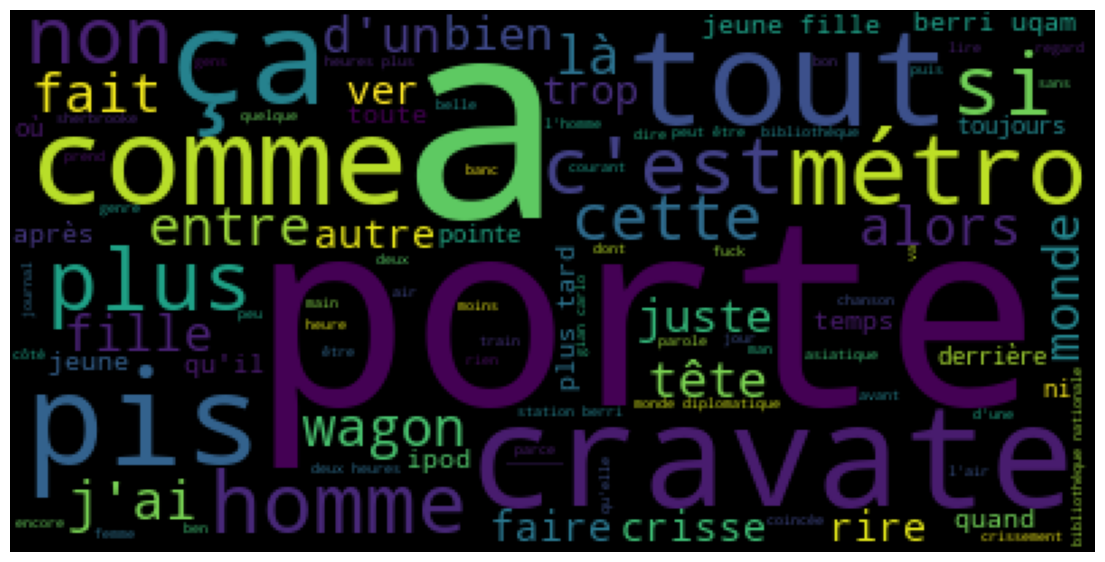

In [13]:

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

title = "Titre"

plt.imshow(wordcloud)
plt.axis('off')
plt.show()